# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(cities)



[   'albany',
    'ushuaia',
    'tyssedal',
    'barrow',
    'katsuura',
    'praia%20da%20vitoria',
    'komsomolskiy',
    'kapaa',
    'kununurra',
    'bolungarvik',
    'hirara',
    'rikitea',
    'salmo',
    'avarua',
    'zyryanovsk',
    'podosinovets',
    'nhulunbuy',
    'moanda',
    'tual',
    'colares',
    'hobart',
    'airai',
    'mataura',
    'east%20london',
    'yar-sale',
    'aklavik',
    'vao',
    'winneba',
    'yellowknife',
    'effingham',
    'kalemie',
    'noyabrsk',
    'touros',
    'genhe',
    'vardo',
    'provost',
    'puerto%20ayora',
    'kaitangata',
    'harper',
    'satitoa',
    'castro',
    'kruisfontein',
    'naze',
    'aban',
    'atuona',
    'sao%20filipe',
    'bethel',
    'erdemli',
    'meulaboh',
    'khandyga',
    'saint%20anthony',
    'ilulissat',
    'taolanaro',
    'abu%20dhabi',
    'karaul',
    'georgetown',
    'vaini',
    'leningradskiy',
    'zhirnov',
    'rocha',
    'bambous%20virieux',
    'anloga',
   

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#creating an empty list 

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
units = "imperial"





url = "http://api.openweathermap.org/data/2.5/weather?"
record = 1 


print ("---Beginning Data Retrieval---")

for city in cities: 

    query_url = url +"appid="+api_key+"&q="+city+"&units="+ units     
   

    try:
        city_data = requests.get(query_url).json()
        
        city_name.append(city_data["name"])
        
        cloudiness.append(city_data["clouds"]["all"])            
        
        country.append(city_data["sys"]["country"])
            
        date.append(city_data["dt"])
        
        humidity.append(city_data["main"]["humidity"])
        
        max_temp.append(city_data["main"]["temp_max"])
            
        lat.append(city_data["coord"]["lat"])
        
        lng.append(city_data["coord"]["lon"])
        
        wind_speed.append(city_data["wind"]["speed"])
        
        city_record = city_data["name"]
        
        print(f"Processing Record {record}| {city_record}")
        print(f"{query_url}") 
        record = record +1 
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1)
    
   

    except:
        print ("city not found ... skipping ")
    continue 

    
       
print ("---Data Retrieval Complete ---")       
          
       
        
        
        
    
      
        


---Beginning Data Retrieval---
Processing Record 1| Albany
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=albany&units=imperial
Processing Record 2| Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=ushuaia&units=imperial
Processing Record 3| Tyssedal
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tyssedal&units=imperial
Processing Record 4| Barrow
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=barrow&units=imperial
Processing Record 5| Katsuura
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=katsuura&units=imperial
Processing Record 6| Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=praia%20da%20vitoria&units=imperial
Processing Record 7| Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb

Processing Record 58| Kodiak
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kodiak&units=imperial
Processing Record 59| Lebedinyy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=lebedinyy&units=imperial
Processing Record 60| New Norfolk
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=new%20norfolk&units=imperial
Processing Record 61| Hermanus
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=hermanus&units=imperial
Processing Record 62| Ponta Delgada
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=ponta%20delgada&units=imperial
Processing Record 63| Antofagasta
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=antofagasta&units=imperial
Processing Record 64| Chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b

Processing Record 113| Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=port%20alfred&units=imperial
Processing Record 114| Pevek
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=pevek&units=imperial
Processing Record 115| Young
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=young&units=imperial
Processing Record 116| Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=jamestown&units=imperial
Processing Record 117| Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=cape%20town&units=imperial
Processing Record 118| Mahasamund
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=mahasamund&units=imperial
Processing Record 119| Jiayuguan
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=jiayuguan

city not found ... skipping 
Processing Record 170| Egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=egvekinot&units=imperial
Processing Record 171| Brasschaat
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=brasschaat&units=imperial
Processing Record 172| Ahipara
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=ahipara&units=imperial
Processing Record 173| Bilma
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=bilma&units=imperial
Processing Record 174| Haines Junction
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=haines%20junction&units=imperial
Processing Record 175| Bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=bathsheba&units=imperial
Processing Record 176| Galesong
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea

city not found ... skipping 
Processing Record 226| Inhambane
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=inhambane&units=imperial
Processing Record 227| San Quintin
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=san%20quintin&units=imperial
Processing Record 228| Chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=chernyshevskiy&units=imperial
Processing Record 229| Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=mahebourg&units=imperial
Processing Record 230| North Bend
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=north%20bend&units=imperial
Processing Record 231| Bubaque
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=bubaque&units=imperial
Processing Record 232| Yanam
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 281| Batemans Bay
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=batemans%20bay&units=imperial
Processing Record 282| Sulangan
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=sulangan&units=imperial
Processing Record 283| Alofi
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=alofi&units=imperial
city not found ... skipping 
Processing Record 284| Tevaitoa
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tevaitoa&units=imperial
Processing Record 285| Stokmarknes
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=stokmarknes&units=imperial
Processing Record 286| Balakirevo
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=balakirevo&units=imperial
Processing Record 287| Mangaratiba
http://api.openweathermap.org/data/2.5/weather?appid=cd80e

Processing Record 336| Fez
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=fez&units=imperial
Processing Record 337| Wanlaweyn
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=wanlaweyn&units=imperial
city not found ... skipping 
city not found ... skipping 
Processing Record 338| Brae
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=brae&units=imperial
city not found ... skipping 
Processing Record 339| Mayo
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=mayo&units=imperial
Processing Record 340| Pisco
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=pisco&units=imperial
Processing Record 341| Antsohihy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=antsohihy&units=imperial
Processing Record 342| Idaho Falls
http://api.openweathermap.org/data/2.5/wea

Processing Record 391| Udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=udachnyy&units=imperial
Processing Record 392| Thai Binh
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=thai%20binh&units=imperial
city not found ... skipping 
Processing Record 393| Huaiyin
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=huaiyin&units=imperial
Processing Record 394| Puerto Madryn
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=puerto%20madryn&units=imperial
Processing Record 395| Port Blair
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=port%20blair&units=imperial
city not found ... skipping 
Processing Record 396| Zhuhai
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=zhuhai&units=imperial
Processing Record 397| Ovsyanka
http://api.openweathermap.org/

Processing Record 447| Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=petropavlovsk-kamchatskiy&units=imperial
Processing Record 448| Zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=zhigansk&units=imperial
Processing Record 449| Chaiyaphum
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=chaiyaphum&units=imperial
Processing Record 450| Dudinka
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=dudinka&units=imperial
Processing Record 451| Malia
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=malia&units=imperial
Processing Record 452| Xining
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=xining&units=imperial
Processing Record 453| Popondetta
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd

Processing Record 503| Nishihara
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=nishihara&units=imperial
Processing Record 504| Verkh-Chebula
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=verkh-chebula&units=imperial
Processing Record 505| Eirunepe
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=eirunepe&units=imperial
city not found ... skipping 
Processing Record 506| Berlevag
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=berlevag&units=imperial
Processing Record 507| Inhuma
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=inhuma&units=imperial
Processing Record 508| Seydisehir
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=seydisehir&units=imperial
Processing Record 509| Novyy Urgal
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea3

Processing Record 559| Nalut
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=nalut&units=imperial
Processing Record 560| Shenxian
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=shenxian&units=imperial
Processing Record 561| Esperance
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=esperance&units=imperial
Processing Record 562| Ocos
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=ocos&units=imperial
Processing Record 563| Pestovo
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=pestovo&units=imperial
Processing Record 564| Farafangana
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=farafangana&units=imperial
Processing Record 565| Kochetok
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kochetok&units=imperial


# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [7]:
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,90,US,1563823872,88,42.65,-73.75,68.00,8.05
1,Ushuaia,75,AR,1563823838,97,-54.81,-68.31,35.60,5.82
2,Tyssedal,100,NO,1563823947,90,60.12,6.56,60.01,10.00
3,Barrow,0,AR,1563823871,60,-38.31,-60.23,45.17,6.08
4,Katsuura,75,JP,1563823950,100,33.93,134.50,75.99,4.70
5,Praia da Vitoria,20,PT,1563823951,61,38.73,-27.07,78.80,11.97
6,Komsomolskiy,94,RU,1563823850,73,67.55,63.78,52.19,9.42
7,Kapaa,40,US,1563823587,74,22.08,-159.32,82.40,17.22
8,Kununurra,0,AU,1563823954,72,-15.77,128.74,64.40,4.70
9,Hirara,99,JP,1563823956,80,24.80,125.28,82.79,7.23


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

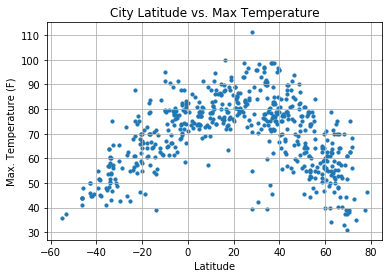

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")


# Show plot
plt.show()

#### Latitude vs. Humidity Plot

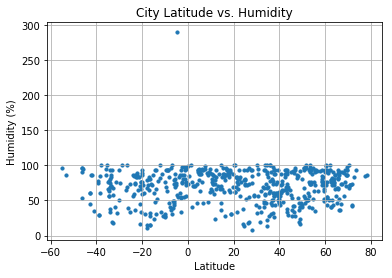

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

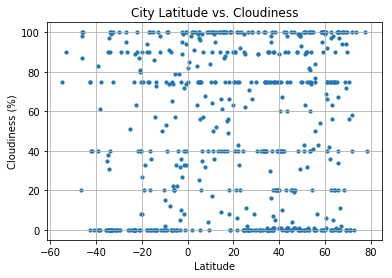

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

In [1]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

NameError: name 'plt' is not defined